# На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

In [1]:
# импортируем необходимые для работы библиотеки

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
#%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# открываем файлы и визуально знакомимся с данными

Rank – место по объему продаж   
Name – название игры   
Platform – платформа, на которой выпущена игра   
Year – год релиза   
Genre – жанр     
Publisher – издатель   
NA_Sales – продажи в Северной Америке, в млн.   
EU_Sales – продажи в Европе, в млн.   
JP_Sales – продажи в Японии, в млн.   
Other_Sales – продажи в остальном мире, в млн.   
Global_Sales – продажи по всему миру, в млн.   

In [3]:
df = pd.read_csv('./games.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# определяем год
year = 1994 + hash(f'l-kovach-23') % 23
year

2011

In [6]:
df_year = df.query('Year == @year')
df_year.Year = df_year.Year.astype('int')
df_year.head()

C:\Users\Лидия\AppData\Local\Temp\ipykernel_5168\2739930992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year.Year = df_year.Year.astype('int')


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
42,43,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
53,54,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
60,61,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26


In [7]:
# Какая игра была самой продаваемой в этом году во всем мире?
df_best_selling = df_year.groupby('Name', as_index=False) \
            .agg({'Global_Sales':'sum'}) \
            .sort_values('Global_Sales', ascending=False) \
            .iloc[0].Name
df_best_selling

'Call of Duty: Modern Warfare 3'

In [11]:
df_year

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
42,43,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
53,54,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
60,61,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26
...,...,...,...,...,...,...,...,...,...,...,...
16543,16546,Driving Simulator 2011,PC,2011,Racing,NaN,0.00,0.01,0.00,0.00,0.01
16545,16548,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011,Puzzle,Unknown,0.01,0.00,0.00,0.00,0.01
16578,16581,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


In [20]:
# Игры какого жанра были самыми продаваемыми в Европе? Перечислить все, если их несколько
df_best_selling_europe = df_year.groupby('Genre').agg({'EU_Sales':'sum'}).sort_values('EU_Sales', ascending=False)
df_best_selling_europe = df_best_selling_europe.EU_Sales.idxmax()
df_best_selling_europe

'Action'

In [23]:
#     На какой платформе было больше всего игр, которые продались более чем миллионным тиражом в Северной Америке?
      # Перечислить все, если их несколько

get_platform_na = df_year.query("NA_Sales > 1.0").groupby('Platform').agg({'NA_Sales' : 'sum'}).NA_Sales.idxmax()
get_platform_na

'X360'

In [32]:
# 4.У какого издателя самые высокие средние продажи в Японии?
# Перечислить все, если их несколько
get_avg_sales_JP = df_year.groupby('Publisher').agg({'JP_Sales' : 'mean'}).JP_Sales.idxmax()
get_avg_sales_JP

'Nintendo'

In [37]:
#    5. Сколько игр продались лучше в Европе, чем в Японии?
get_eu_vs_jp = df_year
get_eu = get_eu_vs_jp.groupby('Name', as_index=False).agg({'EU_Sales':'sum'})
get_jp = get_eu_vs_jp.groupby('Name', as_index=False).agg({'JP_Sales' : 'sum'})
get_eu

,Name,EU_Sales
0,100 Classic Games,0.03
1,1001 Touch Games,0.17
2,18 Wheels of Steel: Extreme Trucker 2,0.02
3,7 Wonders: Treasures of Seven,0.03
4,7th Dragon 2020,0.00
...,...,...
777,Zumba Fitness 2,1.07
778,de Blob 2,0.19
779,inFAMOUS 2,0.49
780,thinkSMART: Chess for Kids,0.00


In [38]:
get_eu_vs_jp_2 = get_eu.merge(get_jp, on='Name')
get_eu_vs_jp_2

,Name,EU_Sales,JP_Sales
0,100 Classic Games,0.03,0.00
1,1001 Touch Games,0.17,0.00
2,18 Wheels of Steel: Extreme Trucker 2,0.02,0.00
3,7 Wonders: Treasures of Seven,0.03,0.00
4,7th Dragon 2020,0.00,0.20
...,...,...,...
777,Zumba Fitness 2,1.07,0.00
778,de Blob 2,0.19,0.00
779,inFAMOUS 2,0.49,0.08
780,thinkSMART: Chess for Kids,0.00,0.00


In [42]:
get_eu_vs_jp_3 = get_eu_vs_jp_2.query('EU_Sales > JP_Sales').shape[0]
get_eu_vs_jp_3

416

In [7]:
df.shape

(16598, 11)

In [8]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [9]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [11]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
df.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.**

In [14]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [15]:
df = df.dropna()

**Какие переменные являются количественными, а какие категориальными?**

Rank (место) - ранговая				
Name (название) - номинативная			
Platform (платформа) - номинативная				
Genre (жанр) - номинативная				
Publisher (издатель) - номинативная				
Year (год) - дискретная				
NA_Sales (объем продаж) - непрерывная				
EU_Sales (объем продаж) - непрерывная    
JP_Sales (объем продаж) - непрерывная				
Other_Sales (объем продаж) - непрерывная				
Global_Sales (объем продаж) - непрерывная

**Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.**

In [18]:
df['Year'] = df.Year.astype('int64')

C:\Users\Лидия\AppData\Local\Temp\ipykernel_11400\4284247300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.Year.astype('int64')


In [20]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

*Медианный (50%) год больше (2007) , чем средний (2006)*

In [28]:
ss.mode(df.Year)

ModeResult(mode=array([2009], dtype=int64), count=array([1431]))

C:\Users\Лидия\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


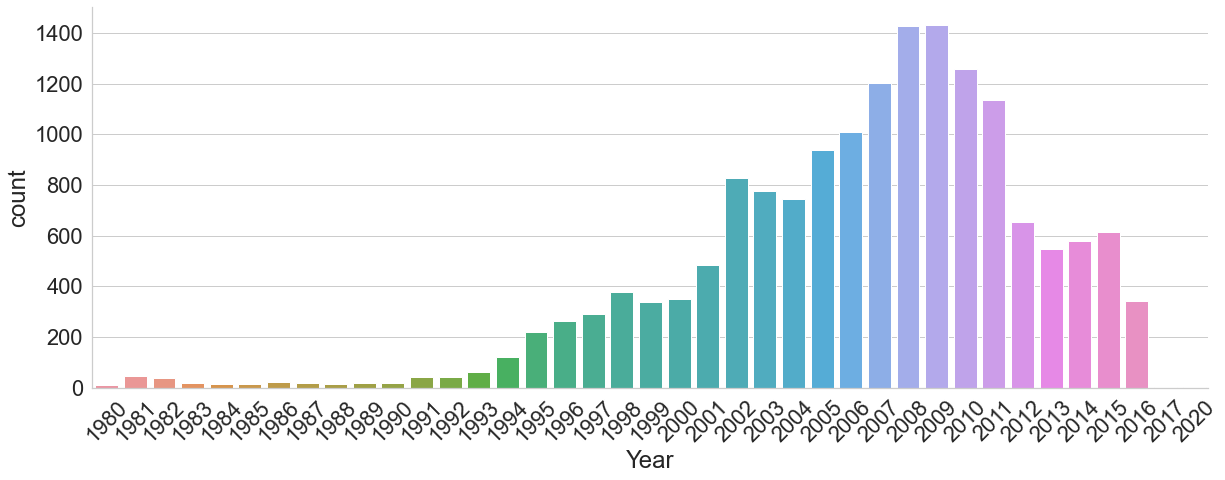

In [44]:
ax = sns.countplot(df.Year)
plt.xticks(rotation=45)
sns.despine()
plt.show()

*Распределение не является нормальным*

**Верно ли утверждение что "Примерно половина игр была выпущена после 2007 года"?**

In [19]:
df.query('Year > 2007').shape[0] / df.shape[0]

0.4906390031305629

*Да, утверждение что примерно половина игр была выпушена после 2007 года, верно*

**На каких платформах произошло больше всего релизов?
Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.**

In [30]:
pop_platform = df.Platform.value_counts(normalize = True) \
                            .mul(100).to_frame('pct')
pop_platform.query("pct > 7").index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [31]:
df.Platform.value_counts(normalize = True)

DS      0.130808
PS2     0.130563
PS3     0.080044
Wii     0.079185
X360    0.075747
PSP     0.073476
PS      0.072985
PC      0.057578
XB      0.049291
GBA     0.048247
GC      0.033270
3DS     0.030630
PSV     0.025167
PS4     0.020625
N64     0.019397
SNES    0.014671
XOne    0.013075
SAT     0.010619
WiiU    0.008778
2600    0.007120
NES     0.006016
GB      0.005954
DC      0.003192
GEN     0.001657
NG      0.000737
SCD     0.000368
WS      0.000368
3DO     0.000184
TG16    0.000123
GG      0.000061
PCFX    0.000061
Name: Platform, dtype: float64

**Игры каких издателей (Publisher) встречаются в датасете чаще всего?
В качестве ответа укажите наибольшую абсолютную частоту встречаемости.**

In [32]:
df.Publisher.value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [33]:
# второй способ
ss.mode(df.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

**Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 
В каком регионе медианное значение объема продаж является наибольшим?**

In [35]:
df_Nintendo = df.query("Publisher == 'Nintendo'")

#первый способ
df_Nintendo.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696,696,696.00000,696,696,696.000000,696.000000,696.000000,696.000000,696.000000
unique,NaN,662,10,NaN,12,1,NaN,NaN,NaN,NaN,NaN
top,NaN,Mario Tennis,DS,NaN,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,149,NaN,111,696,NaN,NaN,NaN,NaN,NaN
mean,3801.864943,NaN,NaN,2003.83046,NaN,NaN,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,NaN,NaN,7.77637,NaN,NaN,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,NaN,NaN,1983.00000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,NaN,NaN,2000.00000,NaN,NaN,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,NaN,NaN,2005.00000,NaN,NaN,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,NaN,NaN,2009.00000,NaN,NaN,0.972500,0.482500,0.740000,0.090000,2.262500


In [36]:
#второй способ
df_Nintendo['NA_Sales'].agg(['mean', 'median', 'std'])

mean      1.172055
median    0.375000
std       2.989913
Name: NA_Sales, dtype: float64

**Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:    
по оси x будет расположен жанр игры (Genre)       
по оси у – объем продаж в Японии (JP_sales)     
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?**

<Figure size 1152x1152 with 0 Axes>

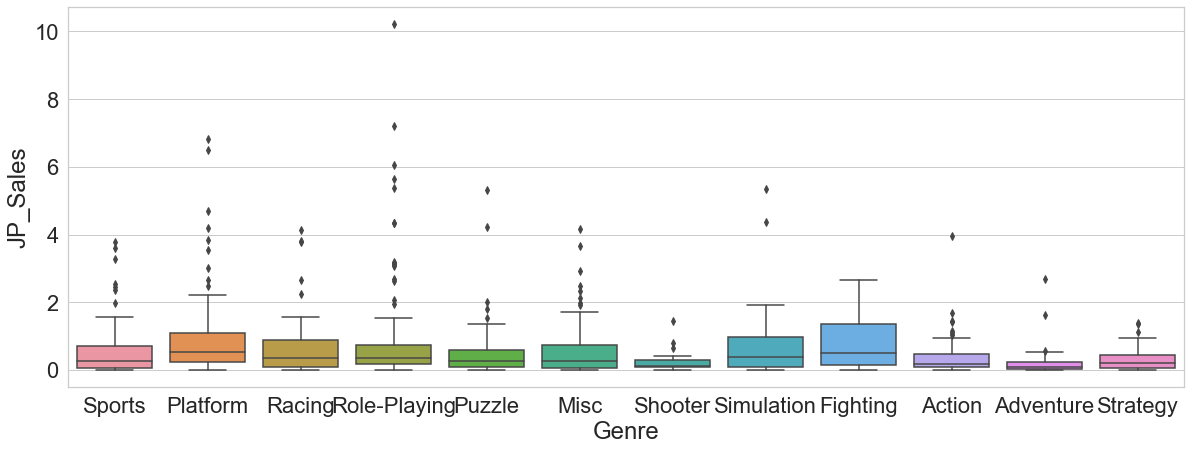

<Figure size 1152x1152 with 0 Axes>

In [41]:
sns.boxplot(x = 'Genre', y = 'JP_Sales', data = df_Nintendo)
plt.figure(figsize=(16, 16))

*Межквартильный размах у Strategy меньше, чем у Puzzle.  
Наибольший межквартильный размах наблюдается у игр жанра Fighting
Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation*

**Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.
На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.**

In [186]:
df_Nintendo_Global = df_Nintendo.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')") \
                                .groupby(['Genre', 'Year'], as_index = False) \
                                .agg({'Global_Sales' : 'sum'})
df_Nintendo_Global

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

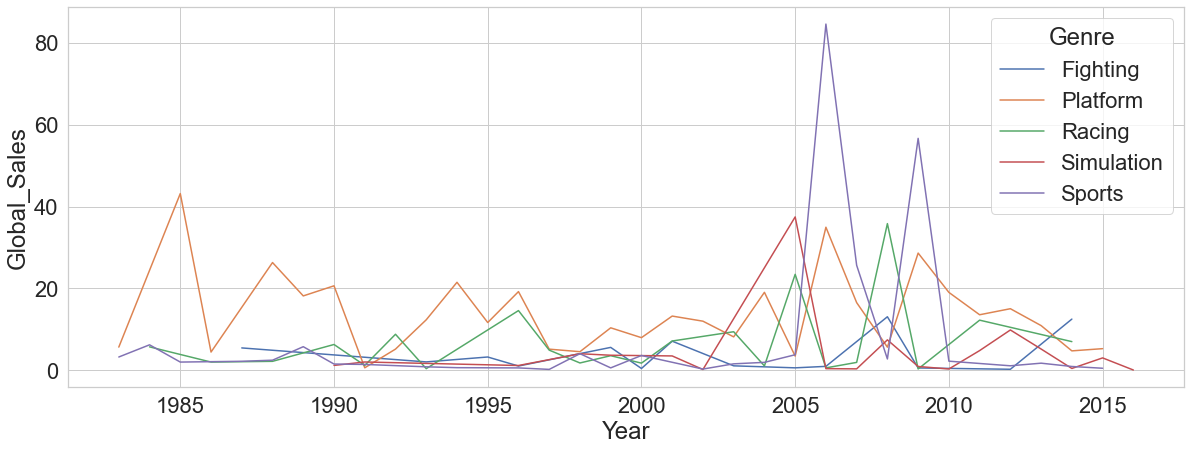

In [188]:
sns.lineplot(x='Year', y = 'Global_Sales', hue = 'Genre', data = df_Nintendo_Global)

*Игры жанра Sports были наиболее популярны в 2005 - 2010 гг.*